___
# Multiple Linear Regression
___

## Imports

In [1]:
# data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ploting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

# data preprocesing
from sklearn.preprocessing import Imputer #replace missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #encoding categorical data
from sklearn.preprocessing import StandardScaler #feature scaling

#spliting data
from sklearn.cross_validation import train_test_split

# models
from sklearn.linear_model import LinearRegression
# backward elimitnation
import statsmodels.formula.api as sm
from statsmodels.regression.linear_model import OLSResults

# metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Exploring the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Text(0.5,1,'HISTOGRAM')

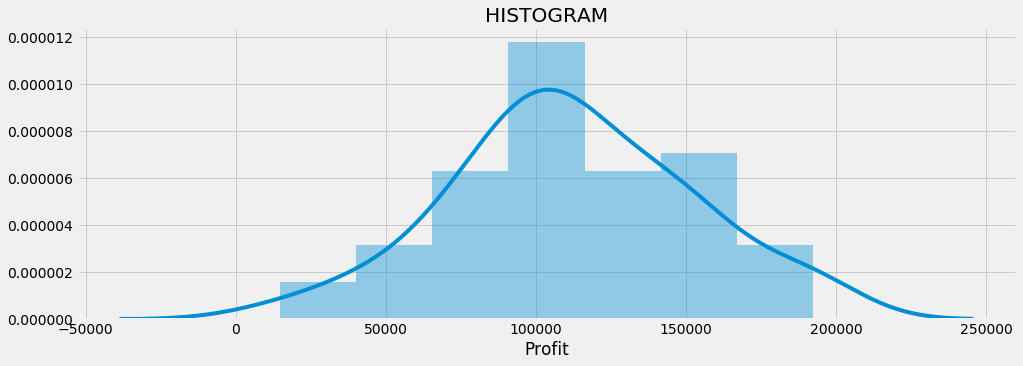

In [5]:
    sns.distplot(dataset['Profit'])
    plt.title("HISTOGRAM")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


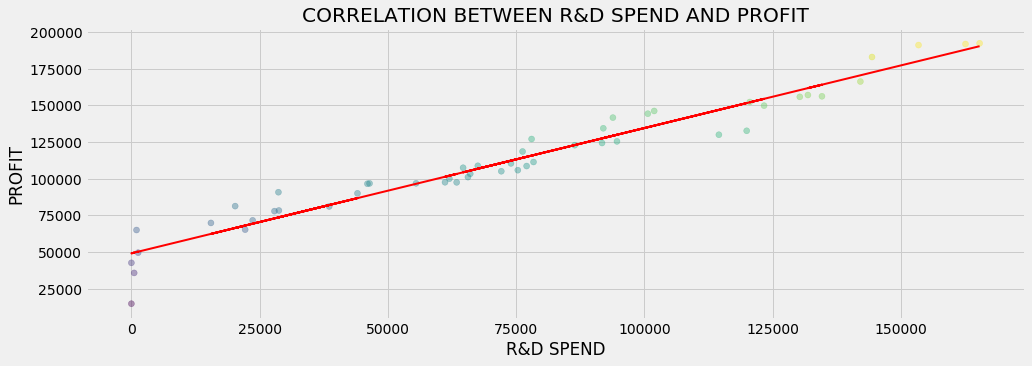

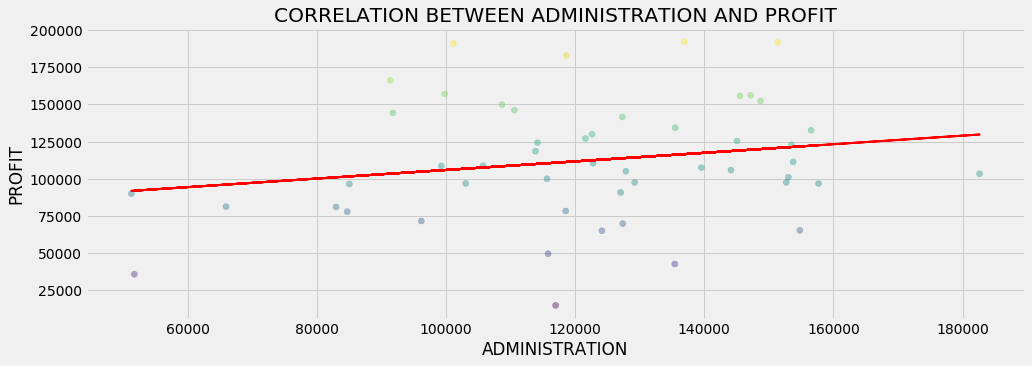

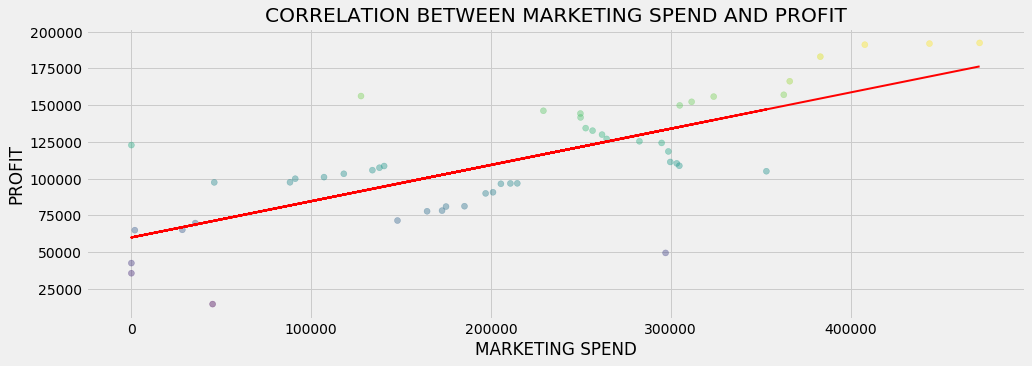

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
def show_corr(data, ylabel):
    for columnName in data.columns.values.tolist():
        column = data[columnName]
        if column.dtype == "object" or columnName == ylabel:
            continue
        column = column.reshape(-1,1)
        xlabel = columnName.upper()
        y = data[ylabel]
        model = LinearRegression()
        model.fit(column, y)
        predictions =  model.predict(column)
        plt.plot(column, predictions, color='red', linewidth=2)
        plt.scatter(column, y, alpha=0.4, c=y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel.upper())
        plt.title("CORRELATION BETWEEN " + xlabel + " AND " + ylabel.upper())
        plt.show()

show_corr(dataset,"Profit")

dataset.corr()

Text(0.5,1,'CORRELATION')

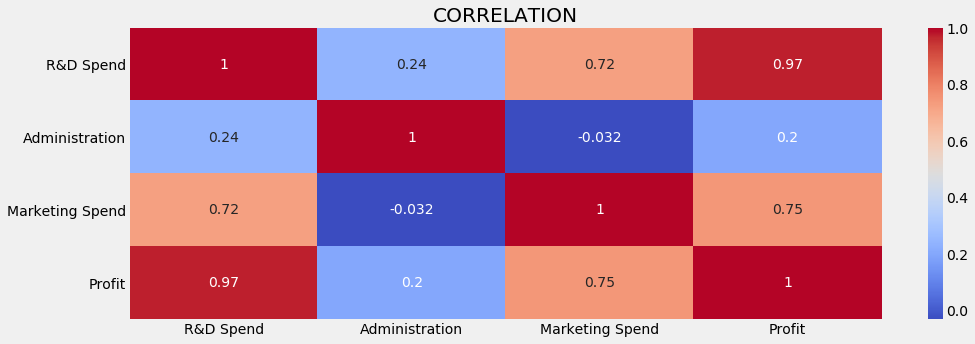

In [7]:
sns.heatmap(data=dataset.corr(),cmap="coolwarm",annot=True)
plt.title("CORRELATION")

## Data Processing

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

### Encoding Categorial Data

In [9]:
enconder_X = LabelEncoder()
X[:,3] = enconder_X.fit_transform(X[:,3])
onehot_encoder_x = OneHotEncoder(categorical_features=[3])
X = onehot_encoder_x.fit_transform(X).toarray()
pd.DataFrame(data=X, columns=['California','Florida','New York','R&D Spend','Administration','MKT Spend']).head()

,California,Florida,New York,R&D Spend,Administration,MKT Spend
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


### Avoiding the Dymmy Variable Trap

In [10]:
X = X[:,1:] #removing the 1st column

### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Creating and Training the model

In [12]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predictions

In [13]:
linear_regressor_predictions = linear_regressor.predict(X_test)

## Performace

In [14]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

def plot_performance_metrics(y_true, y_predict, model_name):
    #ploting the values
    true_handle = plt.scatter(y_true, y_true, alpha=0.6, color='green', label='true')
    #reference line
    fit = np.poly1d(np.polyfit(y_true,y_true,1))
    lims = np.linspace(min(y_true) - 1, max(y_true) + 1)
    plt.plot(lims, fit(lims), alpha= 0.3, color='black')
    # plot predic valus
    pred_handle =  plt.scatter(y_true, y_predict, alpha=0.6, color='red', label='predicted')
    # legend and show
    plt.legend(handles=[true_handle, pred_handle], loc='upper left')
    score = performance_metric(y_true, y_predict)
    print ("\nThe " + model_name +" model R^2, is {:.3f}.".format(score))
    plt.title("The " + model_name +" model R^2, is {:.3f}.".format(score))
    plt.show()


The Linear Regression model R^2, is 0.935.


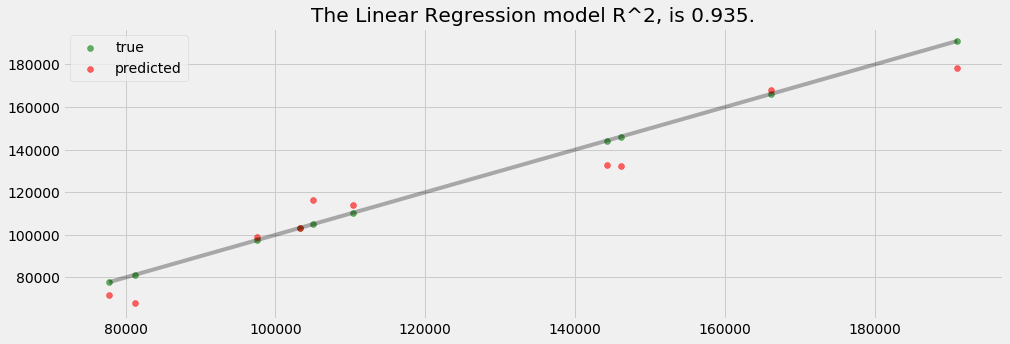

In [15]:
plot_performance_metrics(y_test, linear_regressor_predictions, "Linear Regression")

## Evaluating Model

In [16]:
r2 = r2_score(y_test, linear_regressor_predictions)
mean_absolute_error = mean_absolute_error(y_test,linear_regressor_predictions)
mean_squared_error = mean_squared_error(y_test,linear_regressor_predictions)
root_mean_squared_error = sqrt(mean_squared_error)
print("R^2  : " + str(r2))
print("MAE  : " + str(mean_absolute_error))
print("MSE  : " + str(mean_squared_error))
print("RMSE : " + str(root_mean_squared_error))

R^2  : 0.934706847328
MAE  : 7514.29365964
MSE  : 83502864.0326
RMSE : 9137.990152794797


## Building the optimal model using Backward Elimitation

In [17]:
# adding inteceptor to da dataset manualy as a column of ones
X = np.append(arr= np.ones((50,1)).astype(int), values=X, axis=1) #axis 1 == column

In [43]:
def get_highst_pvalue_index(regressor_OLS):
    sl = 0.05
    high_pv = (0,-1)
    for i,v in enumerate(regressor_OLS.pvalues):
        if (v > sl and v >= high_pv[0] and i > 0):
            high_pv=(v,i)
    return high_pv[1]

def build_columns(X=None, exclude=-1):
    total_columns = X.shape[1]
    x_cols = list(range(total_columns))
    if(exclude == -1):
        return x_cols
    x_columns = []
    for c in x_cols:
        if c == exclude:
            continue
        x_columns.append(c)
    return x_columns

def backward_elimination(X):
    X_optimal = X[:,build_columns(X)]
    regressor_OLS = sm.OLS(endog=y, exog=X_optimal).fit()
    last = get_highst_pvalue_index(regressor_OLS)
    while (last != -1):
        X_optimal = X_optimal[:,build_columns(X_optimal, last)]
        regressor_OLS = sm.OLS(endog=y, exog=X_optimal).fit()
        last = get_highst_pvalue_index(regressor_OLS)
    return X_optimal

In [44]:
X_optimal = backward_elimination(X)
pd.DataFrame(X_optimal).head()

,0,1
0,1.0,165349.20
1,1.0,162597.70
2,1.0,153441.51
3,1.0,144372.41
4,1.0,142107.34


In [45]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,1.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,1.0,0.0,153441.51,101145.55,407934.54
3,1.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,1.0,0.0,142107.34,91391.77,366168.42
